In [1]:
# IMPORTACIÓN DE LAS BIBLIOTECAS QUE NECESITAMOS USAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [3]:
# Me genero unos datos de juguete
from scipy import signal

fs = 1000 #Hz
tmax = 3 # Tiempo (segundos) de registro
t = np.linspace(1/fs,tmax,tmax*fs)

f = 13. # Hz. Acuerdense del punto para que no sean enteros!!
t0 = 1
ciclos = 13
dur = ciclos/f
A = 5 # Amplitud en Volts

xo = A*(signal.square(2 * np.pi * f * t)+1)/2
xo[t<t0] = 0
xo[t>t0+dur] = 0

ruido = np.random.normal(0, 0.01*A, len(xo)) # Le sumo ruido con el 1% de la amplitud
x = xo + ruido

In [7]:
# OPCION 2: GENERO LA FUNCION (como hice para el R^2), y despues lo calculo
def calculo_velocidad(t,x,distancia,UMBRAL):
    y = (x > UMBRAL)*1.
    dy = y[1:len(y)] - y[0:(len(y)-1)]
    ti = []
    for item in range(0,len(dy)-1):
        if (dy[item]==1.):
            ti.append(t[item])
    ti = np.asarray(ti)
    #items = [item for item in range(0,len(dy)-1) if (dy[item]==1.)]
    #ti = t[items]

    dt = ti[1:len(ti)] - ti[0:(len(ti)-1)]
    vel = distancia / dt # m/s
    tprom = (ti[1:len(ti)] + ti[0:(len(ti)-1)])/2

    output = {'tprom':tprom,'vel':vel}
    return output 

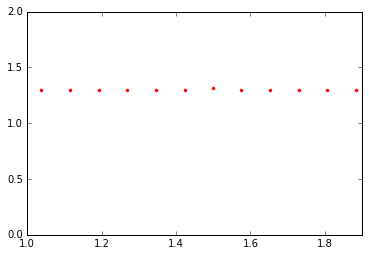

In [8]:
output = calculo_velocidad(t,x,distancia,UMBRAL)

plt.plot(output['tprom'],output['vel'],'r.')
plt.ylim(0,2)
plt.show()